# Basic plotting with Pandas

Pandas has some built-in methods for plotting, based in the background on Matplotlib, the very powerful (and for me, confusing) grand-daddy of the Python visualization modules.

**[Pandas chart visualization documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)**
has much more detail and more plot types than we'll cover here.

We'll start, like usual, by importing Pandas

In [14]:
import pandas as pd
import polars as pl
import altair as alt

Note: For some older versions of Jupyter notebooks we also need to use an
[iPython magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
to tell Matplotlib to render inline in the notebook. *Change the cell below to a code cell if you find you need to execute it.*

---

*To preserve the mystery, select from the notebook menus*

`Edit -> Clear All Outputs`

---

## Loading the data from a CSV file

This is the first time you're seeing data loading from a CSV (Commma-Separated Value) file. That's a very common file type for tablular (spreadsheet) data, where the values are stored in a plain text file, and the values are separated with commas as the "delimeter" (separating) character. Another common delimeter is a tab character.

It's not uncommon to run into cases when you need to change the `read_csv()` defaults to do things like force column data types, but here we can get away with just supplying the file name. For a much more full example of options, see the beginning of the [Groupby_NCexploration.ipynb](Groupby_NCexploration.ipynb) notebook.

*With most `read_csv()` and `to_csv()` commands you should get into the habit of including what's called the "[character encoding](https://docs.python.org/3/library/codecs.html#standard-encodings)" explicitly in the arguments you pass. There are many encoding schemes that allow text files to include characters beyond the first 256 ASCII characters, such as accented and Asian language characters. For example, the most common character encoding is called UTF-8.*

So, I almost always would write the commands like this:

```
df = pd.read_csv('in_file.csv', encoding='utf-8')
df.to_csv('out_file.csv', encoding='utf-8')
```

In [2]:
df = pl.read_csv('data/women_percent_deg_usa_subset.csv')

### Percent women in bachelor's degree categories data set

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women. The data set is broken up into 17 categories of degrees, with each column as a separate category. Randal Olson has made it available on 
[his personal website](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv), or you can get it from [Kaggle](https://www.kaggle.com/sureshsrinivas/bachelorsdegreewomenusa)

**For this exercise we will look at a subset of five of the degrees.**

#### `.head()` and `.tail()`

Often DataFrames are too large to view all at once. The Jupyter notebook default for the maximum number of rows to display is 60, but sometimes we want an even shorter view of the data, so we print out the first or last few rows using the `.head()` or `.tail()` methods.

In [5]:
df.head()

Year,Agriculture,Business,Engineering,Health,Psychology
i64,f64,f64,f64,f64,f64
1970,4.229798,9.064439,0.8,77.1,44.4
1971,5.452797,9.503187,1.0,75.5,46.2
1972,7.42071,10.558962,1.2,76.9,47.6
1973,9.653602,12.804602,1.6,77.4,50.4
1974,14.074623,16.20485,2.2,77.9,52.6


#### You can put a number in the parentheses to control the line count

In [6]:
df.tail(3)

Year,Agriculture,Business,Engineering,Health,Psychology
i64,f64,f64,f64,f64,f64
2009,48.667224,48.840474,16.8,85.1,77.1
2010,48.730042,48.757988,17.2,85.0,77.0
2011,50.037182,48.180418,17.5,84.8,76.7


---

## Line plot

We often print table values to see what our data looks like, but **data visualization is a marvelous way to explore our data!**

Since this is a time-series, the natural starting place for visualization is a line plot. Pandas has a pretty simple syntax for its basic chart types.

You can either use the plot method directly, and tell it which "kind" of plot you want, 

`df.plot(kind='line')`

or you can follow the plot with a dot and the type of plot

`df.plot.line()`

### Pandas plots expect "wide" data kind of like Excel does!

Pandas is kind of like Excel for plotting, in that it wants the data in the sort of "wide" format our data is in right now, where our X-axis data is in one column, and each series that will go on the Y-axis are in separate columns. 

**This probably means that Pandas expects you to make a Pivot Table out of your data before plotting, just like Excel does!**

*I show in other notebooks that packages like Seaborn and Altair want the data in "tidy" or "tall" format, as do the "tidyverse" R packages and some commercial programs like Tableau.*

#### If you specify the x column, then Pandas will assume you want to use the rest for Y!

#### Or, you can specify which columns to plot with `y=[,,]`

### Index is default for X

If you don't specify anything for X, Pandas will assume you want to use the DataFrame Index. In this case we have a default, sequential integer Index, and we see the Year gets plotted as one of our lines.

### Set Index from a column

We can set the Year column to be the Index with `df.set_index()`

**Note that this time we're using the `inplace=True` argument instead of reassigning the result.** A lot of Pandas DataFrame methods have this option.

#### Now we don't have to specify X

### Get rid of annoying text output with ; (semi-colon)

Some Python objects have a useful default output when the cell is executed. These plots do not – that's why you see the `<AxesSubplot:xlabel='Year'>` before the plot itself. I get tired of that extra text output inside <> charcters that also prints out with a Matplotlib plot.

*It seems that the only way to get rid of that text is to follow your plot command by a semi-colon character `;`. Evidently that suppresses cell output, which here is that extra text.*

## Polars uses Altair by default, so you need tidy data!

- plot using Altair considered unstable [https://docs.pola.rs/api/python/stable/reference/dataframe/plot.html]()
- altair>=5.4.0 is required for `.plot`

In [26]:
df_tall = df.unpivot(
    index='Year',
    variable_name = 'Field',
    value_name = 'Percent'
).with_columns(pl.col('Year')
                     .cast(pl.String)
                     .str
                     .to_datetime("%Y")
                     .alias('Yeardate')
                    )
df_tall

Year,Field,Percent,Yeardate
i64,str,f64,datetime[μs]
1970,"""Agriculture""",4.229798,1970-01-01 00:00:00
1971,"""Agriculture""",5.452797,1971-01-01 00:00:00
1972,"""Agriculture""",7.42071,1972-01-01 00:00:00
1973,"""Agriculture""",9.653602,1973-01-01 00:00:00
1974,"""Agriculture""",14.074623,1974-01-01 00:00:00
…,…,…,…
2007,"""Psychology""",77.1,2007-01-01 00:00:00
2008,"""Psychology""",77.2,2008-01-01 00:00:00
2009,"""Psychology""",77.1,2009-01-01 00:00:00


In [27]:
df_tall.plot.line(
    x = 'Year:Q', 
    y = 'Percent:Q', 
    color = 'Field:N'
)

alt.Chart(...)

In [28]:
df_tall.plot.line(
    alt.X('Year:Q'), 
    alt.Y('Percent:Q'), 
    alt.Color('Field:N')
)

alt.Chart(...)

In [25]:
df_tall.plot.line(
    alt.X('Yeardate:T'),
    alt.Y('Percent:Q'),
    alt.Color('Field:N')
)

alt.Chart(...)

### Set the plot size

We can also set the figure size with an easy argument, `figsize=[,]`. I have no idea what the units are.

#### It's horrible that figsize is size [across,down]!

This is especially hard for me to remember because many conventions in Pandas are [down,across], like `df.loc[row,column]`. It's probably an x,y convention sneaking its way in...

In [33]:
df_tall.filter(
    pl.col('Field').is_in(['Business','Psychology'])
).plot.line(
    alt.X('Yeardate:T'),
    alt.Y('Percent:Q'),
    alt.Color('Field:N')
).properties(
    width=500, 
    height=200
)

alt.Chart(...)

## Subplots for small-multiples

Often plots will become confusing with too many lines overlapping. One solution is to split the plots up in a way that still allows comparison across categories.

- We typically call these "small multiples" or "faceted" plots
- Figsize is for whole composite figure (not each subplot)
- **Note that the default is to have independent y-axis ranges!** (But shared X)

In [42]:
df_tall.plot.line(
    alt.X('Yeardate:T'),
    alt.Y('Percent:Q'),
    alt.Color('Field:N')
).properties(
    width=100, 
    height=200
).facet(
    column='Field'
)

alt.FacetChart(...)

### Set the subplot arrangement grid

`layout=(rows, columns)` sets the grid for subplots. 

#### Notice that suplots are [rows,columns] like DataFrame access!

In [46]:
df_tall.plot.line(
    alt.X('Yeardate:T'),
    alt.Y('Percent:Q'),
    alt.Color('Field:N')
).properties(
    width=100, 
    height=100
).facet(
    facet='Field',
    columns=3
)

alt.FacetChart(...)

### You can put a `-1` in one layout entry to say "as many as needed"

*Notice that even here where plots are side-by-side, the default is still not a shared y-axis range*

### Force shared axes with `sharex=True` and/or `sharey=True`

**Shared axes should really be the default so we can make realistic comparisons!** Notice how different your perception is of these degree comparisons with a shared Y axis.

---

## Bar chart

Trying to do a bar chart of our whole time-series won't be illuminating, so let's calculate the mean values in each field over the data set. *Notice that this output is a Series.*

In [55]:
df_tall.group_by('Field').agg(pl.col('Percent').mean()).sort('Percent', descending=True)

Field,Percent
str,f64
"""Health""",82.983333
"""Psychology""",68.77619
"""Business""",40.653471
"""Agriculture""",33.848165
"""Engineering""",12.892857


### Vertical bar chart

**You can *chain the plot commands* right onto the end of the mean calculation!** This is the same thing as if we did a sequence

```
deg_means = df.mean()
deg_means.plot.bar()
```

but we don't need an intermediate variable. Again, that is called **chaining** methods when we link them together like a long chain. As you read left-to-right, the methods (functions) work on the output of the previous command.

In [58]:
df_tall.group_by(
    'Field'
).agg(
    pl.col('Percent').mean()
).plot.bar(
    alt.X('Percent:Q'),
    alt.Y('Field:N').sort('-x')
)

alt.Chart(...)

### Horizontal bar chart

## Sorted bar charts

**This visualization would more effectively show us the patterns in the data if the bars were sorted by length (descending)**. We can easliy do that with the `.sort_values()` method, which we can use for either a DataFrame or a Series. (Here, the mean over the columns is a Series.)

**We will again chain the commands for convenience.** You can just read the sequence left to right.

### Vertical bar charts go from left to right with the Series order

For the vertical bars, the only complication is that ascending values is the default sort order, so **to get descending order we need to set `ascending=False` explicitly**.

### Horizontal bars go from bottom to top in the Series order!

But for the vertical bar chart, **like in Excel, the plot ordering goes from bottom to top, so we actually want an ascending sort if we want the bars decreasing from top to bottom!**

*Think of the Y-axis being ordered like in a scatterplot, bottom to top, even though we read it top to bottom.*

---

## Histogram

Another useful way to explore your data is to look at the distribution of values in each column. Pandas can make easy histograms.

**Confusingly, there's a difference between calling `df.hist()` and `df.plot.hist()`!**

- `df.hist()` calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.
- `df.plot.hist()` groups the values of all given Series in the DataFrame into bins and draws all bins in one matplotlib.axes.Axes.

### `df.hist()`

The default is to have each set of axes independent, but that makes it harder to compare across the small multiples. Set `sharex=True` and `sharey=True` to make them the same. *I know this makes the default 10 bins for each column different widths, which is unfortunate, but see how your first impression is that the ranges are all similar when you don't force the same axes!*

In [60]:
df_tall.plot.bar(
    alt.X('Percent:Q').bin(),
    y = "count()",
    column = 'Field'
).properties(height=100, width=100)

alt.Chart(...)

In [75]:
df_tall.plot.bar(
    alt.X('Percent:Q').bin(maxbins=25),
    alt.Y("count()").stack(None),
    color = 'Field'
).properties(
    height=100, width=200
).configure_bar(
    opacity=0.5
)

alt.Chart(...)

### We can change the layout of the small multiples

**But notice that the bins are all still different sizes/ranges for each column!**

### `df.plot.hist()`

This results in a single set of axes, with all histograms overlapped in different colors. With this data set there are too many categories overlapping for this to be very useful. **At least it put them automatically on common scales and uses the same bins.**

It helps to make the curves less opaque by setting the `alpha=` value. 1=opaque, 0=transparent.

### Can still use all the same small multiple tricks

I like this form much better

---

## Box plot

A more compact summary of the distribution for comparison is a box (and whiskers) plot.

If you're not familiar with this type of plot, the center line is the median value for that column, the top and bottom of the box are the upper and lower quartiles (75% and 25% percentile values), the "whiskers" extend by default at most to 1.5x the inner-quartile range, and any values outside this limit are shown as individual outlier circles.

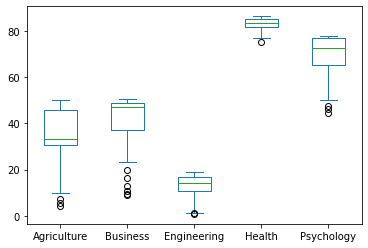

In [25]:
df.plot.box();

### Boxplot (and other layered charts) sort broken

So have to use a list for now...

In [104]:
df_tall.group_by('Field').agg(pl.col('Percent').mean()).sort('Percent', descending=True).get_columns()[0].to_list()

['Health', 'Psychology', 'Business', 'Agriculture', 'Engineering']

In [108]:
df_tall.plot.boxplot(
    y=alt.Y("Field:N").sort(['Health', 'Psychology', 'Business', 'Agriculture', 'Engineering']),
    x="Percent:Q",
    color="Field:N"
).configure_boxplot(
    extent="min-max"
)

alt.Chart(...)

In [109]:
df_tall.plot.circle(
    y=alt.Y("Field:N").sort(
        field='Percent',
        op='mean',
        order='descending'
    ),
    x="Percent:Q",
    color="Field:N",
    yOffset="jitter:Q"
).transform_calculate(
    jitter = 'sqrt(-2*log(random()))*cos(2*PI*random())'
)

alt.Chart(...)

### Sorting a box plot

To sort the box plot, it's slightly less straightforward than the bar chart, because **the box plot needs to be computed and plotted with the whole original DataFrame** – we just want to change the order in which the columns are plotted. 

To do this we'll sort the `.median()` Series, which gives us the degree subject area names in the order we want. *We'll just use the degree names to specify the column ordering for plotting, which are stored in the Index of the Series. We won't actually use the median values – those get calculated by the box plot routine for chart creation.*

#### Ordered degree names are in the Index

Note that, just like the line plot, we need to give the degree names in the `y=` argument, since in the Pandas plotting routines **Y is always the columns that are being used**, not the Y-axis of the resulting plot!!

### Horizontal box plot

To make the boxplot horizontal, we need to feed in a `vert=False` argument. **This type of thing is why I don't tend to use the Pandas plotting routines – the syntax doesn't always make sense, and the arguments change based on the plot you're doing!**

*Take my Altair workshop to learn about a Python plotting module that is more consistent in its syntax, even if it isn't as convenient because it's not built into Pandas.*

Just like in the bar chart, left-to-right vertical boxplot translates into bottom-to-top in the horizontal version.